# Introduction and Problem Statement

Introduction:
The imbalance between energy intake and expenditure where the intake exceeds the demand or usage of energy in a human body results in the activation of adipogenesis [1]. Adipogenesis is a process where adipocytes are formed and accumulate as adipose tissue. This process can result in the formation of fat deposits at different sites in the human body [2]. The persistent formation of fat deposits results in obesity, a biological process that can cause downstream health problems, including type 2 diabetes [3].

Alpha-Lapachone is an organic heterotricyclic compound and an organooxygen compound. Alpha-Lapachone is a natural product found in Firmiana simplex, Catalpa ovata, and other organisms [4]. The compound had been reported for having the anti-infectious activity [5].



Problem Statement:

Beta-Lapachone is a member of the Naphthoquinones class of compounds. The naphthoquinones compounds are mostly found to have antibacterial, antifungal, antiviral, insecticidal, anti-inflammatory, and antipyretic properties [6]. Recent experimentation shows beta-lapachone; a member of naphthoquinones, to have antiobesity activity [7]. Alpha-lapachone is another member of naphthoquinones class with a similar chemical constitution. There is a need to annotate alpha-lapachone against the possession of antiobesity activity. This research will broaden the scope of the chemical nature of antiobesity compounds.



References:



1. Michael W Schwartz, Randy J Seeley, Lori M Zeltser, Adam Drewnowski, Eric Ravussin, Leanne M Redman, Rudolph L Leibel, Obesity Pathogenesis: An Endocrine Society Scientific Statement, Endocrine Reviews, Volume 38, Issue 4, 1 August 2017, Pages 267–296, https://doi.org/10.1210/er.2017-00111  
2. Haider, Nida & Larose, Louise. (2019). Harnessing adipogenesis to prevent obesity. Adipocyte. 8. 1-7. 10.1080/21623945.2019.1583037.   
3. Heidi S Camp, Delin Ren, Todd Leff, Adipogenesis and fat-cell function in obesity and diabetes, Trends in Molecular Medicine,Volume 8, Issue 9, 2002, Pages 442-447, ISSN 1471-4914, https://doi.org/10.1016/S1471-4914(02)02396-1.
4. National Center for Biotechnology Information (2023). PubChem Compound Summary for CID 72732, alpha-Lapachone. Retrieved September 26, 2023 from https://pubchem.ncbi.nlm.nih.gov/compound/alpha-Lapachone.
5. Peixoto, J. F., Oliveira, A. D. S., Gonçalves-Oliveira, L. F., Souza-Silva, F., & Alves, C. R. (2023). Epoxy-α-lapachone (2,2-Dimethyl-3,4-dihydro-spiro[2H-naphtho[2,3-b]pyran-10,2'-oxirane]-5(10H)-one): a promising molecule to control infections caused by protozoan parasites. The Brazilian journal of infectious diseases : an official publication of the Brazilian Society of Infectious Diseases, 27(2), 102743. https://doi.org/10.1016/j.bjid.2023.102743
6. Dmitry Aminin, Sergey Polonik, 1,4-Naphthoquinones: Some Biological Properties and Application, Chemical and Pharmaceutical Bulletin, 2020, Volume 68, Issue 1, Pages 46-57, Released on J-STAGE January 01, 2020, Online ISSN 1347-5223, Print ISSN 0009-2363, https://doi.org/10.1248/cpb.c19-00911
7. Kwak, H. J., Jeong, M. Y., Um, J. Y., & Park, J. (2019). β -Lapachone Regulates Obesity through Modulating Thermogenesis in Brown Adipose Tissue and Adipocytes: Role of AMPK Signaling Pathway. The American journal of Chinese medicine, 47(4), 803–822. https://doi.org/10.1142/S0192415X19500423


# Importations

In [ ]:
# imports

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Data Preprocessing

In [ ]:
# data importation

target = pd.read_csv("/data/alpha_lapachone_targets_tripeptide.csv", header=None)
print(target.shape)
decoy = pd.read_csv('/data/tripeptide_data_non-pd.csv', header=None)
decoy = decoy.head(84)
print(decoy.shape)

(42, 8000)
(84, 8000)


In [ ]:
# data transformation and mangling

target['label'] = 1
decoy['label'] = 0
df = pd.concat([target, decoy], ignore_index=True)
df = shuffle(df)
print (df.shape)
print (df)
df.fillna(method ='pad', inplace=True) # filling null values with pad

(126, 8001)
     0  1  2  3  4  5  6  7  8  9  ...  7991  7992  7993  7994  7995  7996  \
25   0  1  0  0  0  0  0  2  0  0  ...     0     0     0     2     0     0   
55   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
33   4  0  0  0  0  1  1  2  0  0  ...     1     0     0     0     0     0   
97   0  0  1  0  0  0  0  0  0  0  ...     0     0     0     0     2     1   
69   0  0  0  2  0  0  0  0  0  1  ...     0     0     0     0     0     0   
..  .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
96   0  0  0  1  0  0  0  1  0  0  ...     0     0     0     0     1     0   
3    0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
86   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
47   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
110  1  0  0  0  0  0  1  0  0  1  ...     0     0     0     0     0     1   

     7997  7998  7999  label  
25      1     0     

In [ ]:
# features extraction

features = df.iloc[:, :-1]; features

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
25,0,1,0,0,0,0,0,2,0,0,...,0,0,0,0,2,0,0,1,0,0
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,4,0,0,0,0,1,1,2,0,0,...,0,1,0,0,0,0,0,0,0,0
97,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,1
69,0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# labels extraction

labels = df.iloc[:,-1:]; labels

,label
25,1
55,0
33,1
97,0
69,0
...,...
96,0
3,1
86,0
47,0


In [ ]:
# splitting dataset

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=50)

# Training and Evaluation

## Classification Report

The classfication report consist of evaluations matrices including precision, recall, f1 and support to evaluate the performance of the trained machine learning model falling under the domain of classification problem.

> `Precision = (true positives / predicted positives) = TP / TP + FP`

> `Recall = (true positives / all actual positives) = TP / TP + FN`

> `F1 = 2 * (Precision * Recall) / (Precision + Recall)`

> `Support = Occurences of a class`


The decoy protens that are not the target of alpha lapachone have 80% precision and 50% recall indicating 50% lack in learning the patterns of decoy target class.
The target proteins that are the target of alpha lapachone have 87% precision and 96% recall indicating the 13% of the predictions are from the decoy class; with 4% error rate, a high target class pattern learning. These training parameters would be ideal to screen the alpha-lapachone's target-like proteins.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.868421052631579

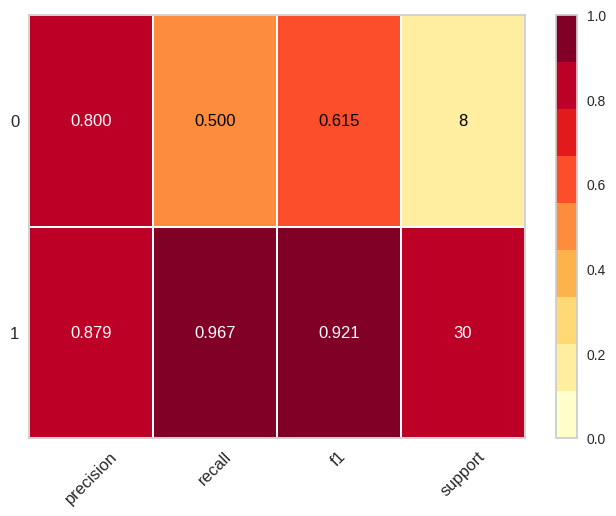

In [ ]:
# classification report

#classes = ["decoy_tripeptide", "target_tripeptide"]
model_1 = LogisticRegression()
visualizer = ClassificationReport(model_1, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

## ROC Curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise.’ In other words, it shows the performance of a classification model at all classification thresholds.

The x-axis showing 1 – specificity/false positive fraction.


> `FPR = FP/(FP+TN)`

The y-axis showing sensitivity/true positive fraction.

> `TPR / Recall / Sensitivity = TP/(TP+FN)`

The area under the curve for both decoy and target tripeptides is **0.89**, the indication of clear and distinct training of a model to differentiate between decoy tripeptide and target tripeptide classes.





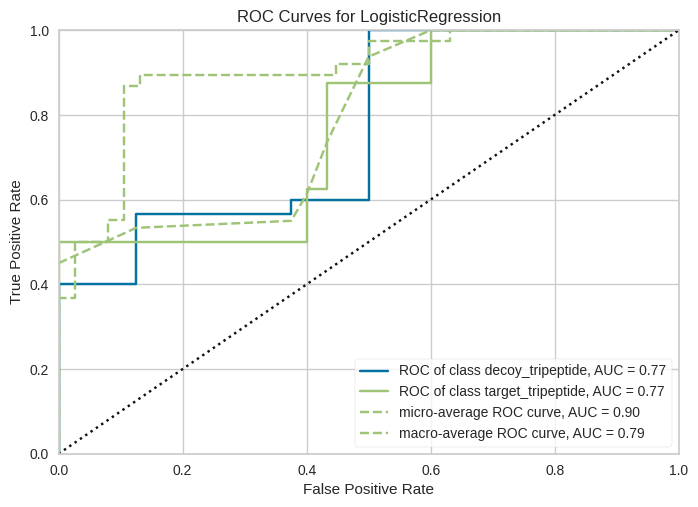

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Roc Curve

visualizer_1 = ROCAUC(model_1, classes = ["decoy_tripeptide", "target_tripeptide"])
visualizer_1.fit(X_train, y_train)
visualizer_1.score(X_test, y_test)
visualizer_1.show()
